In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
def solve_heat_equation(phi, lambda_x, lambda_y, dx, dy, dt, eps=1e-9):
    Nt, Nx, Ny = phi.shape
    TX = 1./dx*lambda_x/dx
    TY = 1./dy*lambda_y/dy
    c = -TX
    b = -TX
    g = -TY
    f = -TY
    gamma = 1./dt
    a = -(c+b+g+f)+gamma
    mse = 0.
    alphas = [0]*Nx
    betas = [0]*Nx
    for t in range(1, Nt):
        k = 0
        rmse = 1.
        if t%10 == 0:
            print 'Timestep {0}'.format(t)
        while rmse > eps:
            mse = 0.
            for j in range(1, Ny-1):
                alphas[2] = -b/a
                betas[2] = (gamma*phi[t-1, 1, j]-g*phi[t, 1, j-1]-f*phi[t, 1, j+1])/a
                for i in range(3, Nx):
                    alphas[i] = -b/(c*alphas[i-1]+a)
                    betas[i] = (gamma*phi[t-1, i-1, j]-g*phi[t, i-1, j-1]-f*phi[t, i-1, j+1]-c*betas[i-1])/(
                        c*alphas[i-1]+a)
                for i in reversed(range(1, Nx-1)):
                    new_value = alphas[i+1]*phi[t, i+1, j]+betas[i+1]
                    mse += (new_value-phi[t, i, j])**2
                    phi[t, i, j] = new_value
            k += 1
            rmse = np.sqrt(mse/((Nx-2)*(Ny-2)))

In [170]:
phi_0 = 1
lambda_x = 1e-2
lambda_y = lambda_x
x_0, x_max, Nx = 0, 1, 100
y_0, y_max, Ny = 0, 1, 100
t_0, t_max, Nt = 0, 10, 1000
dx = (x_max-x_0)/(Nx-1.)
dy = (y_max-y_0)/(Ny-1.)
dt = (t_max-t_0)/(Nt-1.)
xs = np.linspace(x_0, x_max, Nx)
ys = np.linspace(y_0, y_max, Ny)
ts = np.linspace(t_0, t_max, Nt)
XX, YY = np.meshgrid(xs, ys)

phi = np.zeros(shape=(Nt, Nx, Ny), dtype=np.float64)
phi[0, :, :] = phi_0*np.cos(np.pi*XX)*np.sin(np.pi*YY)

for k in range(Nt):
    for i in {0, Nx-1}:
        x = xs[i]
        t = ts[k]
        phi[k, i, :] = phi_0*np.cos(np.pi*x)*np.sin(np.pi*ys)*np.exp(-(lambda_x+lambda_y)*np.pi**2*t)

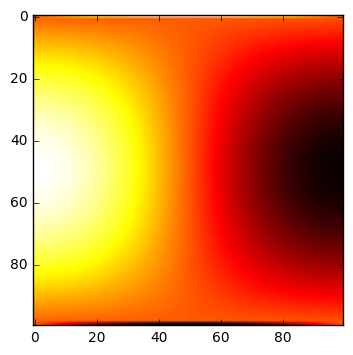

In [171]:
plt.imshow(phi[0, :, :], cmap='hot')
plt.show()

In [172]:
phi[0, :, :]

array([[  0.00000000e+00,   3.17279335e-02,   6.34239197e-02, ...,
          6.34239197e-02,   3.17279335e-02,   1.22464680e-16],
       [  3.17279335e-02,   3.17119598e-02,   3.16640549e-02, ...,
         -3.16640549e-02,  -3.17119598e-02,  -3.17279335e-02],
       [  6.34239197e-02,   6.33919884e-02,   6.32962268e-02, ...,
         -6.32962268e-02,  -6.33919884e-02,  -6.34239197e-02],
       ..., 
       [  6.34239197e-02,   6.33919884e-02,   6.32962268e-02, ...,
         -6.32962268e-02,  -6.33919884e-02,  -6.34239197e-02],
       [  3.17279335e-02,   3.17119598e-02,   3.16640549e-02, ...,
         -3.16640549e-02,  -3.17119598e-02,  -3.17279335e-02],
       [ -0.00000000e+00,  -3.17279335e-02,  -6.34239197e-02, ...,
         -6.34239197e-02,  -3.17279335e-02,  -1.22464680e-16]])

In [173]:
solve_heat_equation(phi, lambda_x, lambda_y, dx, dy, dt, 1e-9)

Timestep 10
Timestep 20
Timestep 30
Timestep 40
Timestep 50
Timestep 60
Timestep 70
Timestep 80
Timestep 90
Timestep 100
Timestep 110
Timestep 120
Timestep 130
Timestep 140
Timestep 150
Timestep 160
Timestep 170
Timestep 180
Timestep 190
Timestep 200
Timestep 210
Timestep 220
Timestep 230
Timestep 240
Timestep 250
Timestep 260
Timestep 270
Timestep 280
Timestep 290
Timestep 300
Timestep 310
Timestep 320
Timestep 330
Timestep 340
Timestep 350
Timestep 360
Timestep 370
Timestep 380
Timestep 390
Timestep 400
Timestep 410
Timestep 420
Timestep 430
Timestep 440
Timestep 450
Timestep 460
Timestep 470
Timestep 480
Timestep 490
Timestep 500
Timestep 510
Timestep 520
Timestep 530
Timestep 540
Timestep 550
Timestep 560
Timestep 570
Timestep 580
Timestep 590
Timestep 600
Timestep 610
Timestep 620
Timestep 630
Timestep 640
Timestep 650
Timestep 660
Timestep 670
Timestep 680
Timestep 690
Timestep 700
Timestep 710
Timestep 720
Timestep 730
Timestep 740
Timestep 750
Timestep 760
Timestep 770
Timestep

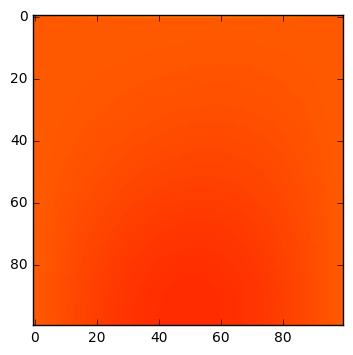

In [174]:
plt.imshow(phi[-1, :, :], cmap='hot', vmin=np.min(phi[0,:,:]), vmax=np.max(phi[0,:,:]))
plt.show()

In [175]:
phi[-1, :, :]

array([[  0.00000000e+00,   4.40736319e-03,   8.81028855e-03, ...,
          8.81028855e-03,   4.40736319e-03,   1.70117075e-17],
       [  0.00000000e+00,  -1.46956788e-05,  -2.94141555e-05, ...,
         -7.91098956e-05,  -3.95936785e-05,   0.00000000e+00],
       [  0.00000000e+00,  -2.94478412e-05,  -5.89411836e-05, ...,
         -1.58282625e-04,  -7.92187707e-05,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -4.40352123e-03,  -8.80268378e-03, ...,
         -8.90202973e-03,  -4.45329449e-03,   0.00000000e+00],
       [  0.00000000e+00,  -4.40761156e-03,  -8.81082268e-03, ...,
         -8.86052070e-03,  -4.43251073e-03,   0.00000000e+00],
       [ -0.00000000e+00,  -4.40736319e-03,  -8.81028855e-03, ...,
         -8.81028855e-03,  -4.40736319e-03,  -1.70117075e-17]])